# 21회 모의고사

## 머신 러닝 (50점)
데이터 : 학생 성적에 관한 데이터세트 제공 394행짜리 소규모 데이터.

1-1. 시각화 포함 탐색적 자료분석을 시행하시오. (EDA) <br>
1-2. 결측치 식별하고 결측치를 예측하는 두 가지 방법 정도를 쓰고, 선택한 이유를 설명하시오.<br>
1-3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 선택한 이유를 설명하시오.<br>
1.4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용. 선택한 이유 설명하시오.<br>
1.5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 학생성적 예측 분석에 적합한 알고리즘인지 설명하시오.<br>
1.6. 세 가지 모델 모두 모델링 해보고 가장 적합한 알고리즘 선택하고 이유 설명. 한계점 설명하고 보완 가능한 부분 설명하고, <br>
현업에서 사용시 주의할 점 등에 대해 기술하시오.<br>

In [2]:
import pandas as pd
import numpy as np 
df = pd.read_csv("../data/student_data.csv")
df.head(3)

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8


In [8]:
nom_cols=[]
num_cols=[] 
for col in df.columns:
    if df[col].dtype == 'object':
        nom_cols.append(col)
    elif df[col].dtype == 'float64' or df[col].dtype == 'int64':
        num_cols.append(col)

In [23]:
print(f'{nom_cols}는 수치형 변수이다.')
for col in nom_cols:
    print(df[col].value_counts())

print('모두 2항 범주형 변수이다.')

['school', 'sex', 'paid', 'activities']는 수치형 변수이다.
school
GP    349
MS     46
Name: count, dtype: int64
sex
F    208
M    187
Name: count, dtype: int64
paid
no     214
yes    181
Name: count, dtype: int64
activities
yes    201
no     194
Name: count, dtype: int64
모두 2항 범주형 변수이다.


In [22]:
print(f'{num_cols}는 수치형 변수이다.')
for col in num_cols:
    print(df[col].value_counts())

print('''그 중에서도 
      [famrel, freetime, goout, Dalc, Walc, health]는 5점 스케일의 서열척도이고,
      [absences, grade, G1, G2]는 정수 형식의 수치형변수이다.''')

['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'grade', 'G1', 'G2']는 수치형 변수이다.
famrel
4.0    194
5.0    106
3.0     68
2.0     18
1.0      8
Name: count, dtype: int64
freetime
3.0    157
4.0    114
2.0     64
5.0     40
1.0     18
Name: count, dtype: int64
goout
3.0    128
2.0    103
4.0     86
5.0     53
1.0     22
Name: count, dtype: int64
Dalc
1.0    274
2.0     75
3.0     25
4.0      9
5.0      8
Name: count, dtype: int64
Walc
1.0    151
2.0     85
3.0     79
4.0     50
5.0     28
Name: count, dtype: int64
health
5.0    145
3.0     90
4.0     66
1.0     46
2.0     44
Name: count, dtype: int64
absences
0.0     115
2.0      65
4.0      52
6.0      31
8.0      22
10.0     16
14.0     12
12.0     12
3.0       8
7.0       7
16.0      6
5.0       5
18.0      5
20.0      4
11.0      3
9.0       3
13.0      3
15.0      3
22.0      3
1.0       3
38.0      1
30.0      1
40.0      1
23.0      1
19.0      1
28.0      1
75.0      1
21.0      1
24.0      1
56.0      1
26.0

## 1-1. 시각화 포함 탐색적 자료분석(EDA)

DataFrame.info() 함수를 통해 데이터 타입 및 결측치 확인

In [33]:
nul_df = df.isnull().sum()
nul_df = nul_df[nul_df > 0]
nul_cols = nul_df.index.tolist()

print(f'결측치를 갖는 열과 결측치 수는 아래와 같다.')
print(nul_df)

결측치를 갖는 열과 결측치 수는 아래와 같다.
famrel      1
freetime    2
goout       3
Dalc        4
Walc        2
health      4
absences    3
dtype: int64


<Axes: >

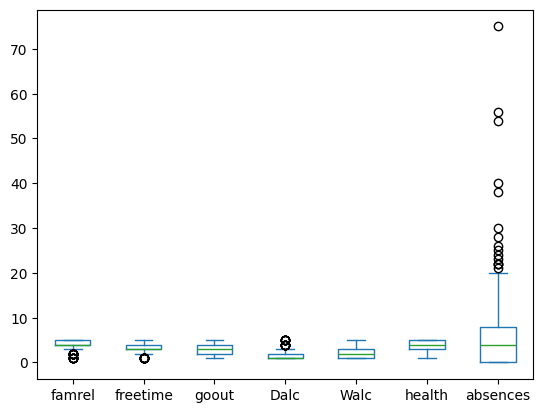

In [34]:
df[nul_cols].plot(kind='box')
print('famrel, freetime, Dalc, absences는 극단값들을 갖는 것으로 보인다.')

In [46]:
outlier_cols = ['famrel', 'freetime', 'Dalc', 'absences']

for col in outlier_cols:
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    UTV = df[col].quantile(0.75) + 1.5*IQR
    LTV = df[col].quantile(0.25) - 1.5*IQR
    outlier_count = df[(df[col] > UTV) | (df[col] < LTV)].shape[0]
    print(f'{col} has {outlier_count} outliers')

famrel has 26 outliers
freetime has 18 outliers
Dalc has 17 outliers
absences has 15 outliers


## 종속변수 분포 확인

종속변수 학생 성적에 대한 분포를 확인한 결과 평균 근처에 관측치가 많은 정규분포 형태를 띄었다. 
Shapriro test 결과도 p-value가 0.05이하로 정규성을 띄고 있음을 확인할 수 있었다. 

또한 해당 종속변수의 값이 정규성을 띄고 다양한 값이 있으므로 다중 classification으로 예측하는 것보다는 회귀분석을 진행하는 것이 좋아보인다. 

## 독립변수 EDA 

## 범주형 변수 시각화 

변수 해석 6가지 
 
1. 결측치 존재 여부 
- 전체 데이터에서 famrel, goout, Dalc, Walc, absences의 변수에서 결측치가 존재한다. 
- 결측치의 개수는 전체 1% 채 되지 않는 19개이다. 
- 결측치가 존재하는 변수들은 flat64형태로 평균으로 대체하거나 KNN을 사용할 수 있을 것으로 보인다. 

2. 데이터 타입 설명 
- 종속변수는 int형, 독립변수는 object와 float형태로 구성되어 있다. object타입은 인코딩을 통하여 변환해줄 필요가 있어보인다. 

3. 종속변수 분포 설명 
- 종속변수의 분포는 정규분포를 띈다. (위에서 설명함) 

4. 종속변수와 독립변수의 상관관계 설명 
- 종속변수 grade와의 상관계수를 확인해 보았을 때, 수치형 변수에서는 큰 상관성이 없었다. 파생변수를 활용할 필요가 있어보인다. 

5. 독립변수 상관관계 설명 
- 독립변수끼리의 상관관계를 확인해본 결과 다중공선성을 걱정할 만큼(0.9이상) 독립변수끼리의 상관성이 큰 변수는 보이지 않았다. 
- 하지만 G1과 G2의 관계는 서로 높으므로 주의할 필요가 있다. 

6. 유의할 점 (pandas_profiling의 warrning 값 설명) 
- 독립변수 중 school의 경우 비대칭성이 있으므로 주의하여야한다. 

## 1-2. 결측치 식별하고 결측치를 예측하는 두 가지 방법 정도를 쓰고, 선택한 이유를 설명하시오.




1) 단순 대치법 : 수치형 변수라면, 각 컬럼의 평균이나 중앙값을 사용하여 결측치를 보간할 수 있으며, 
                 명목형, 범주형 변수라면 최빈값을 사용하여 대치할 수 있습니다. 
                 
2) KNN을 이용한 결측치 대체 : 보간법 중 결측치가 없는 컬럼들의 최근접 이웃 알고리즘을 통해 결측치가 있는 변수 대체를 할 수 있습니다. 
* 단, KNN을 이용할 때에는 거리 계산이 가능한 수치형 변수만 사용 가능 

- 해당 데이터에서는 한 행이 전부 결측치인 경우는 존재하지 않으므로 삭제보다는 대체하는 것이 좋아보인다. 수치형 변수만 결측치가 있으므로 KNN기법을 사용하여 대체하겠다. 




## 1-3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 선택한 이유를 설명.


1) 이산형 변수 : school , sex ,paid,  activities 이 존재, 이산형 변수이므로 boolean 타입으로 변경하여 KNN을 이용한 결측치 처리와 머신러닝에서 변수사용가능하도록 변환하였다. <br>
2) 나머지 변수들은 수치 or 순위형 변수로 판단되므로 원핫인코딩을 하지 않았다. 



## 1.4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용. 선택한 이유 설명.

1) 랜덤 분할 
 - train test데이터셋을 나누어서 학습된 데이터를 검증할 수 있음 
 - 분할 시에 무작위로 사용자가 지정하여 비율로 분할 함 
 - 전체 분석 데이터 중 머신러닝 모델을 학습시키기 위한 학습용 데이터와 테스트 데이터를 나누어서 적용시키는 이유는 
   모델 결과가 다른 데이터에도 적용 가능한지, 일반화가 가능한지를 검증하기 위함이다. 
 
2) 층화 추출 기법 
- 종속변수의 클래스의 비율이 학습용 데이터와 테스트용 데이터에 비율이 같게 분할함 
- 클래스의 편향을 막을 수 있음 
- 종속변수가 범주형 변수인 분류분석에 사용 



해당 데이터는 종속변수가 연속형이므로, 회귀분석을 사용한다. 그러므로 층화추출기법을 사용한 분할이 아닌 랜덤 샘플링을 통한 분할을 사용하여, 7:3 비율로 분할하였다. 



## 1.5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 이 예측 분석에 적합한 알고리즘인지 설명.

* 회귀분석과 분류분석을 모두 할 수 있는 분석알고리즘이다. 
* 모두 범주형 변수를 독립변수로 사용할 수 없어 변환을 해주어야 한다. 
* 과대 적합 과소적합을 막기위한 매개변수의 설정이 필요하다.

* 해당 데이터에서는 종속변수의 값이 연속형이므로 회귀분석이 적합하다. 

## 1.6. 세 가지 모델 모두 모델링 해보고 가장 적합한 알고리즘 선택하고 이유 설명. 한계점 설명하고 보완 가능한 부분 설명.
현업에서 사용시 주의할 점 등에 대해 기술.

## 해석

- 가장적합한 알고리즘 선택 : XGBoost 모델이 가장 정확도가 높고 RMSE값이 낮으므로 예측 분석력이 좋다. 
- XGBoost 분석결과 가족친밀도인 farmrel변수가 최종 성적에 영향을 많이 주는것으로 보였다. 
- 한계점 : G1,G2가 grade와의 상관성이 매우 높은 변수이므로 좋은 결과가 나오지만, 해당 변수를 제외하고 분석하였을 때에는 정확도가 매우 낮게 나온다. 주 변수로 G1, G2를 사용할 수는 있지만 이 또한 성적이기 때문에 성적에 영향을 미치는 변수를 찾기에는 어려워보인다. 성적과 밀접 관련이 있는 추가적인 변수를 추가한다면, 모델의 정확성 뿐만이 아니라 의미있는 분석이 될 것이라 생각한다. 